In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df_relativechange = pd.read_excel("D:/kerja/asisten riset/vol/milkunC/achaidir/IMAGE PBL/SSP2/GFRAC_area_relativechange_per5years_maizev2.xlsx")
df_grapcton = pd.read_excel("D:/kerja/asisten riset/vol/milkunC/achaidir/IMAGE PBL/SSP2/GRAPC_ton_relativechngae_per5yearsv2.xlsx")
ccode_iso = pd.read_excel("D:/kerja/asisten riset/vol/milkunC/achaidir/LUH2 2022/ISO-3166-Country-Code_REV.xlsx", sheet_name="Sheet3")
df_relativechange = df_relativechange[df_relativechange['type'] != "grass"]

In [8]:
df_relativechange.rename(columns={"country": "Country"}, inplace=True)
df_grapcton.rename(columns={"country": "Country"}, inplace=True)

In [9]:
df_relativechange_merge = pd.merge(left=ccode_iso, right=df_relativechange, how="left", left_on="Country", right_on="Country")
df_grapcton_merge = pd.merge(left=ccode_iso, right=df_grapcton, how="left", left_on="Country", right_on="Country")

In [10]:
tahun = np.array([list(range(1980, 2025, 5))])

relativechange_region = df_relativechange_merge.groupby(['Region']).sum()
relativechange_region = relativechange_region.replace([np.inf, -np.inf], np.nan)
relativechange_region = relativechange_region.fillna(0)
relativechange_region = relativechange_region[tahun[0]]

grapcton_region = df_grapcton_merge.groupby(['Region']).sum()
grapcton_region = grapcton_region.replace([np.inf, -np.inf], np.nan)
grapcton_region = grapcton_region.fillna(0)
grapcton_region = grapcton_region[tahun[0]]

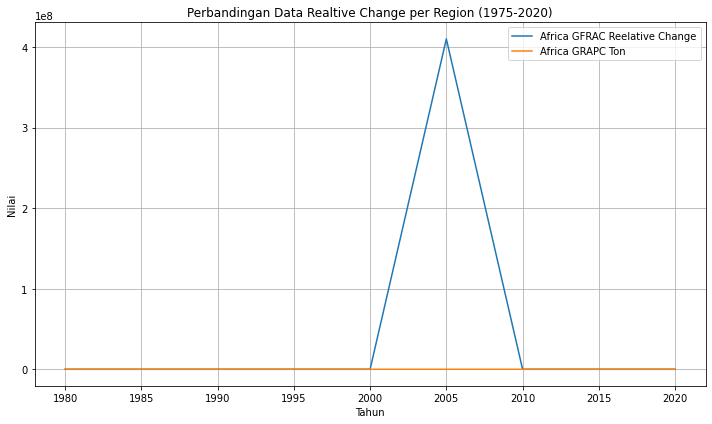

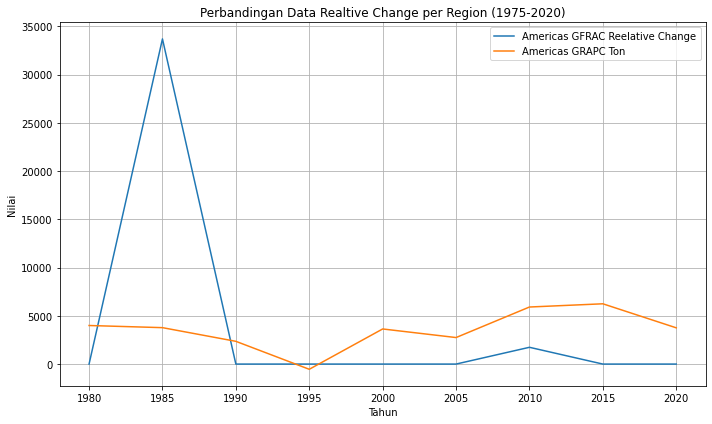

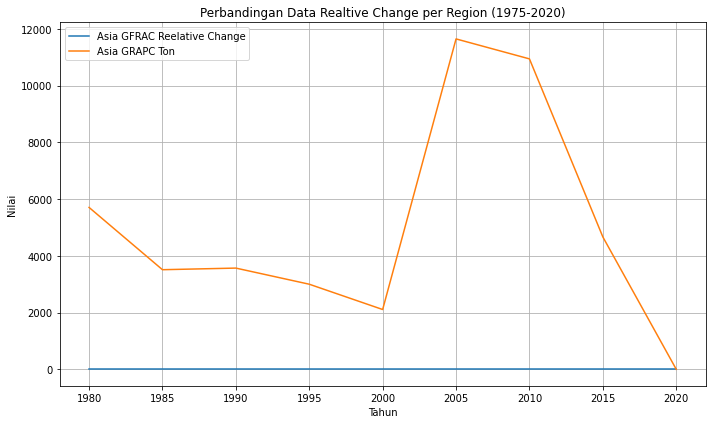

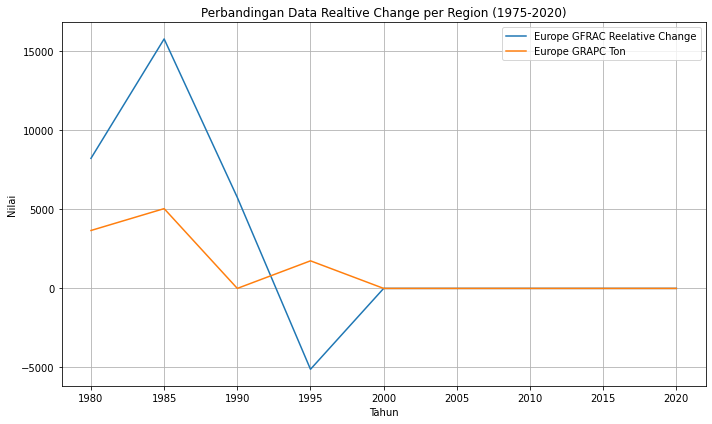

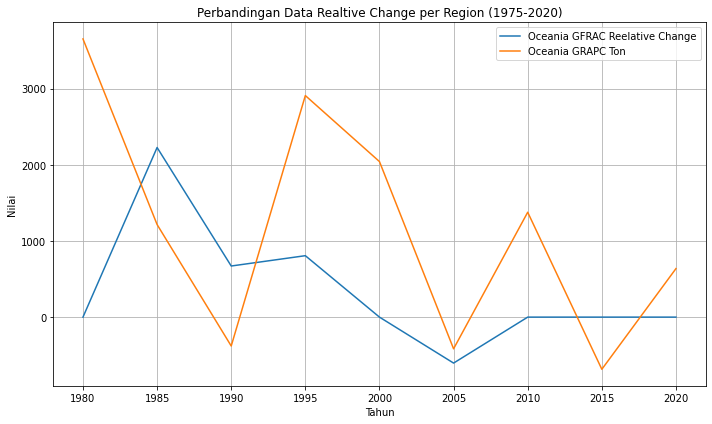

In [13]:
for region in grapcton_region.index.to_list():
    try:
        plt.figure(figsize=(10, 6))
        plt.plot(tahun[0], relativechange_region.loc[region, tahun[0]].values, label=f'{region} GFRAC Reelative Change')
        plt.plot(tahun[0], grapcton_region.loc[region, tahun[0]].values, label=f'{region} GRAPC Ton')
        plt.xlabel('Tahun')
        plt.ylabel('Nilai')
        plt.title('Perbandingan Data Realtive Change per Region (1975-2020)')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        # plt.savefig(f'D:/kerja/asisten riset/vol/milkunarc/cadlan/Analysis3_LUC/grafik/level1/Grafik1_{country}.png')
        plt.show()
    except:
        print(region)

In [14]:
tahun = np.array([list(range(1980, 2025, 5))])

relativechange_subregion = df_relativechange_merge.groupby(['SubRegion']).sum()
relativechange_subregion = relativechange_subregion.replace([np.inf, -np.inf], np.nan)
relativechange_subregion = relativechange_subregion.fillna(0)
relativechange_subregion = relativechange_subregion[tahun[0]]

grapcton_subregion = df_grapcton_merge.groupby(['SubRegion']).sum()
grapcton_subregion = grapcton_subregion.replace([np.inf, -np.inf], np.nan)
grapcton_subregion = grapcton_subregion.fillna(0)
grapcton_subregion = grapcton_subregion[tahun[0]]

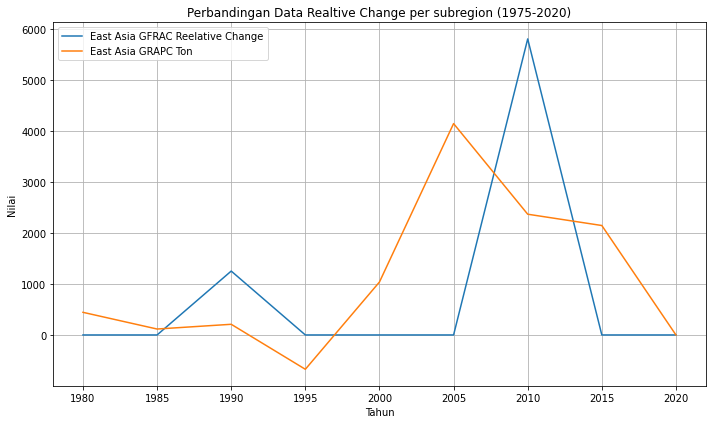

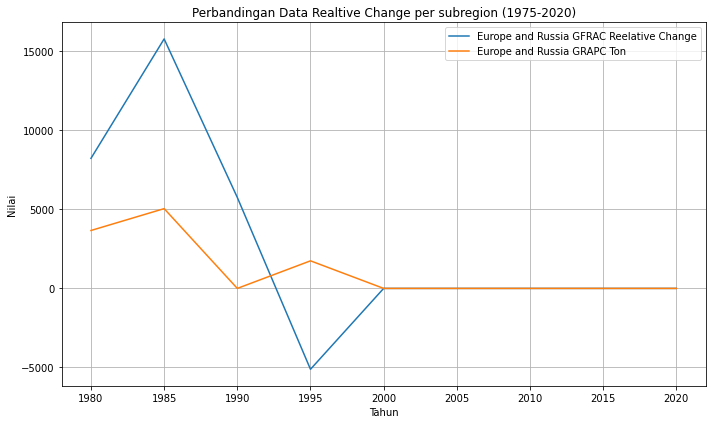

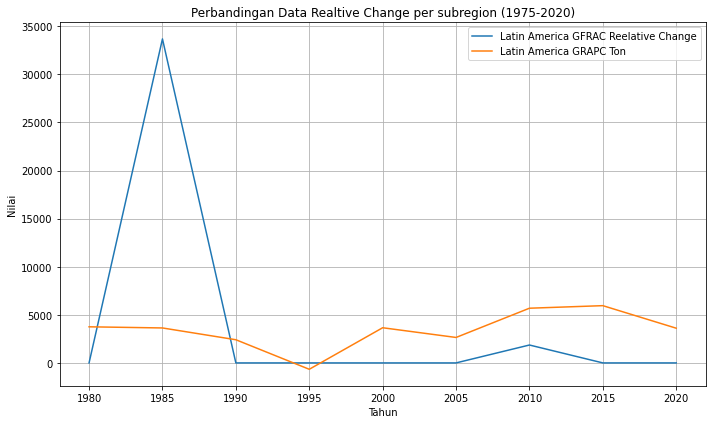

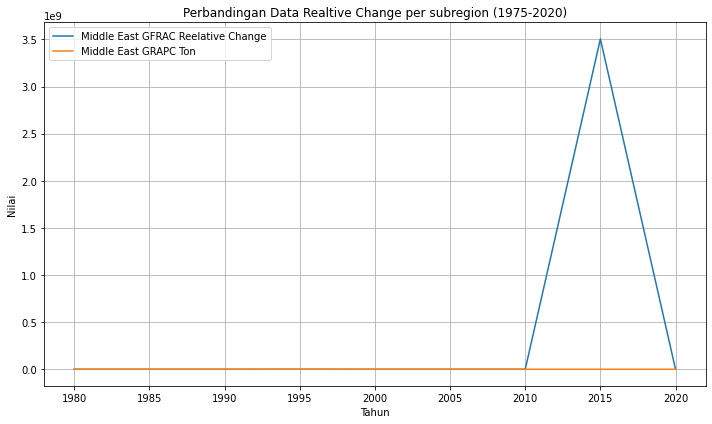

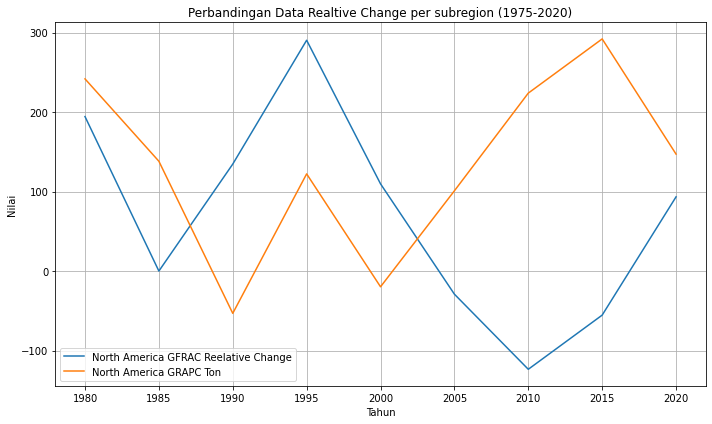

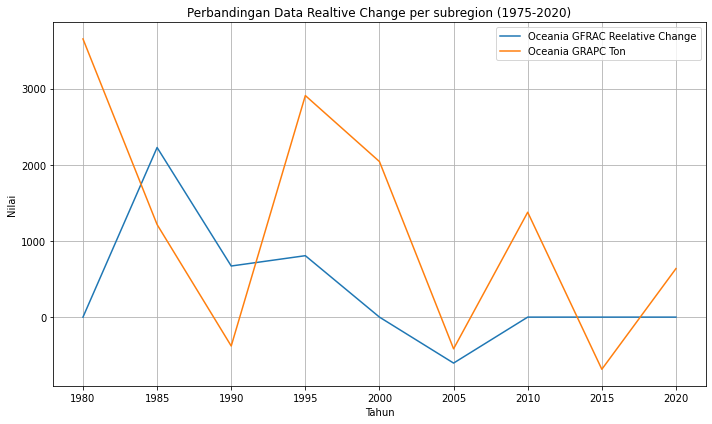

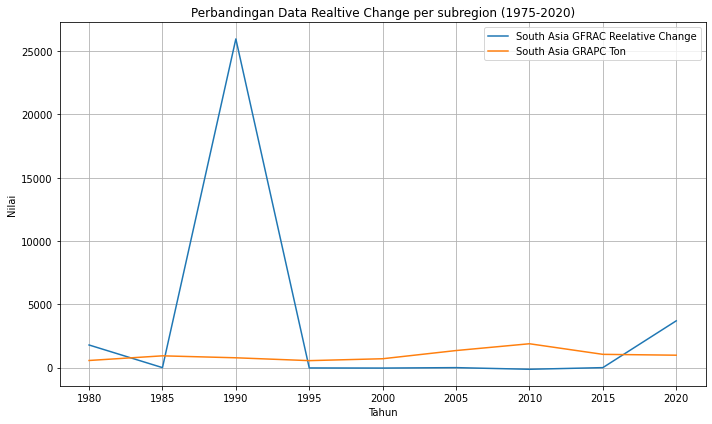

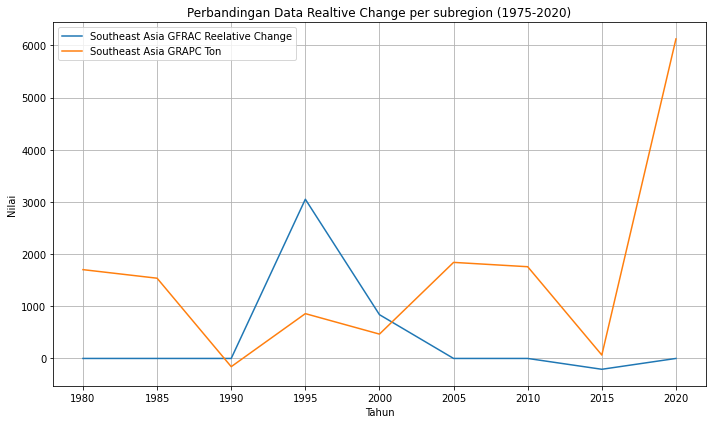

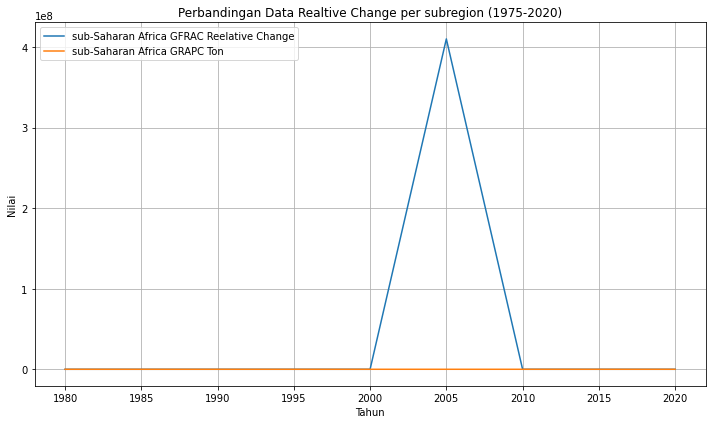

In [15]:
for subregion in grapcton_subregion.index.to_list():
    try:
        plt.figure(figsize=(10, 6))
        plt.plot(tahun[0], relativechange_subregion.loc[subregion, tahun[0]].values, label=f'{subregion} GFRAC Reelative Change')
        plt.plot(tahun[0], grapcton_subregion.loc[subregion, tahun[0]].values, label=f'{subregion} GRAPC Ton')
        plt.xlabel('Tahun')
        plt.ylabel('Nilai')
        plt.title('Perbandingan Data Realtive Change per subregion (1975-2020)')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        # plt.savefig(f'D:/kerja/asisten riset/vol/milkunarc/cadlan/Analysis3_LUC/grafik/level1/Grafik1_{country}.png')
        plt.show()
    except:
        print(region)